# keras-practice-01

## ダミーデータ

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical
import numpy as np

# ダミーデータの作成
data = np.random.random((1000, 784))
labels = np.random.randint(10, size=(1000, 1))
labels = to_categorical(labels, 10) # ラベルの変換

# モデルの作成
model = Sequential()
model.add(Dense(64, input_dim=784))
model.add(Activation("relu"))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("softmax"))

# モデルのコンパイル
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 学習
history = model.fit(data, labels, epochs=20)


# 結果の表示
# 正答率
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## MNISTを利用した手書き数字の識別
### データの表示

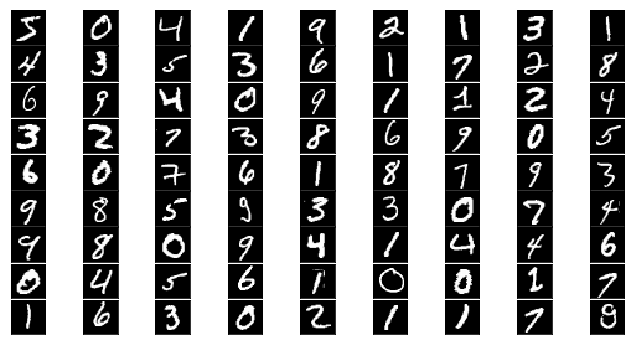

In [26]:
%matplotlib inline
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

#Kerasの関数でデータの読み込み。データをシャッフルして学習データと訓練データに分割してくれる
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#MNISTデータの表示
fig = plt.figure(figsize=(9, 9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)
for i in range(81):
    ax = fig.add_subplot(9, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape((28, 28)), cmap='gray')

### 学習・テスト

60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s - loss: 0.2477 - acc: 0.9238 - val_loss: 0.1058 - val_acc: 0.9682
Epoch 2/20
60000/60000 [==============================] - 13s - loss: 0.1048 - acc: 0.9682 - val_loss: 0.0821 - val_acc: 0.9749
Epoch 3/20
60000/60000 [==============================] - 14s - loss: 0.0748 - acc: 0.9773 - val_loss: 0.0795 - val_acc: 0.9762
Epoch 4/20
60000/60000 [==============================] - 12s - loss: 0.0598 - acc: 0.9821 - val_loss: 0.0821 - val_acc: 0.9770
Epoch 5/20
60000/60000 [==============================] - 11s - loss: 0.0504 - acc: 0.9844 - val_loss: 0.0775 - val_acc: 0.9803
Epoch 6/20
60000/60000 [==============================] - 12s - loss: 0.0425 - acc: 0.9878 - val_loss: 0.0749 - val_acc: 0.9823
Epoch 7/20
60000/60000 [==============================] - 11s - loss: 0.0405 - acc: 0.9884 - val_loss: 0.0636 - val_acc: 0.9857
Epoch 8/20
6000

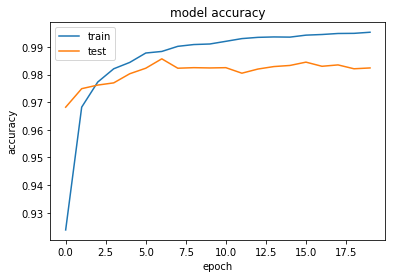

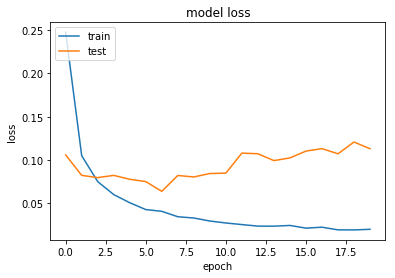

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop

# 学習データの前処理
num_classes = 10
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = y_train.astype('int32')
y_test = y_test.astype('int32')
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test =  keras.utils.np_utils.to_categorical(y_test, num_classes)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


# モデルの作成
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
# コンパイル
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])


# 学習する
batch_size = 128 # バッチサイズ
epochs = 20 # エポック数
history = model.fit(
    x_train, y_train,
    batch_size=batch_size, epochs=epochs,
    verbose=1, validation_data=(x_test, y_test))


# 結果の表示
# 正答率
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()